### Import necessary libraries

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

### a. Get the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_set = {
    'images': train_images,
    'labels': train_labels
}

test_set = {
    'images': test_images,
    'labels': test_labels
}

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### b. Initial Exploration

In [5]:
print('Size of the training set: ', {len(train_set['images'])})
print('Size of the testing set: ', {len(test_set['images'])})
print('Image resolution of images: ', train_set['images'][0].shape)
print('Largest pixel value in dataset: ', np.amax(train_set['images']))

Size of the training set:  {60000}
Size of the testing set:  {10000}
Image resolution of images:  (28, 28)
Largest pixel value in dataset:  255


### c. Data Pre-processing

In [6]:
# Normalize the pixel values
train_set['images'] = train_set['images'] / 255
test_set['images'] = test_set['images'] / 255

In [7]:
# Apply one-hot encoding to the labels
train_set['labels'] = tf.keras.utils.to_categorical(train_set['labels'], num_classes=10)
test_set['labels'] = tf.keras.utils.to_categorical(test_set['labels'], num_classes=10)

In [8]:
print('Shape of training set labels: ', train_set['labels'].shape)
print('Shape of testing set labels: ', test_set['labels'].shape)

Shape of training set labels:  (60000, 10)
Shape of testing set labels:  (10000, 10)


### d. Visualiztion

In [9]:
def visualize_img(ax, img, title): 
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(title)

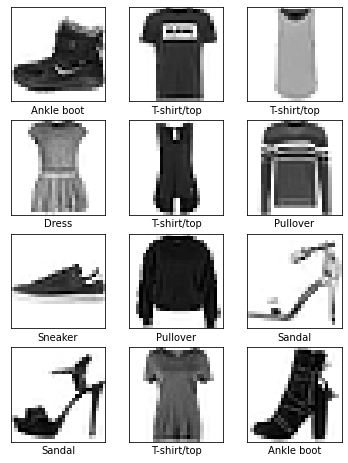

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(6, 8))

for i in range(12):
    img = train_set['images'][i]
    title = class_names[np.argmax(train_set['labels'][i])]
    visualize_img(axes[i // 3, i % 3], img, title)

plt.show()
plt.tight_layout()

### e. Training Data Preparation

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_set['images'], train_set['labels'], test_size=0.2, random_state=32)
X_train = X_train[:,:,:]
X_val = X_val[:,:,:]

In [68]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000, 10)
(12000, 10)


### f. Build, Train, and Validate RNN Model

In [133]:
X_train = X_train.reshape(48000, 784)
X_val = X_val.reshape(12000, 784)
y_train = y_train.reshape(48000, 10)
y_val = y_val.reshape(12000, 10)

In [139]:
from tensorflow.keras import datasets, layers, models

rnn_model = models.Sequential()
rnn_model.add(layers.LSTM(128, input_shape=[784]))
rnn_model.add(layers.Dense(10, activation = 'softmax'))

ValueError: Input 0 of layer lstm_40 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 784)

In [140]:
rnn_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [137]:
rnn_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 128)               467456    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 468,746
Trainable params: 468,746
Non-trainable params: 0
_________________________________________________________________


In [138]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=8, validation_data = (X_val, y_val))

Epoch 1/8


ValueError: in user code:

    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/wonsukcha/miniforge3/envs/tf/lib/python3.8/site-packages/keras/engine/input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_32 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 784)


### g. Test and analyze the model

In [ ]:
df_accuracy = pd.DataFrame(rnn_history.history)
df_accuracy = df_accuracy.drop(columns=['loss', 'val_loss'])
df_accuracy.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.7,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.show()

In [ ]:
X_test = test_set['images'][:,:,:]
y_test = test_set['labels']

In [ ]:
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)

In [ ]:
def visualize_chart(ax, proba, actual): 
    x = np.arange(10)
    mask_pred = np.argmax(proba)
    mask_actual = np.argmax(actual)
    mask_rest = np.delete(x, np.maximum(mask_pred, mask_actual))
    mask_rest = np.delete(mask_rest, np.minimum(mask_pred, mask_actual))
    
    ax.bar(x[mask_pred], proba[mask_pred], color='blue')
    ax.bar(x[mask_actual], proba[mask_actual], color='green')
    ax.bar(x[mask_rest], proba[mask_rest], color='grey')
    ax.set_xticks(x)
    ax.set_yticks([])
    ax.set_ylim(0, 1)

In [ ]:
X_test_sample = X_test[33:37, :, :]
y_proba_sample = rnn_model.predict(X_test_sample)
y_actual_sample = y_test[33:37, :]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i in range(4):
    img = X_test_sample[i]
    proba = y_proba_sample[i]
    actual = y_actual_sample[i]
    title = f'{class_names[np.argmax(y_actual_sample[i])]} ({np.argmax(y_actual_sample[i])})'
    visualize_img(axes[2*i // 4, 2*i % 4], img, title)
    visualize_chart(axes[2*i // 4, 2*i % 4 + 1], proba, actual)

plt.show()
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_classes = np.argmax(y_test, axis=1)
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)